# 过拟合和欠拟合

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc0


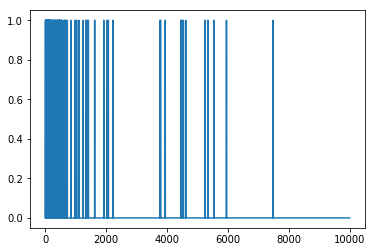

In [2]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
plt.plot(train_data[0])

防止过度拟合的最简单方法是减小模型的大小，即模型中可学习参数的数量。

深度学习模型往往善于适应训练数据，但真正的挑战是概括，而不是适合。

另一方面，如果网络具有有限的记忆资源，则将不能容易地学习映射。为了最大限度地减少损失，它必须学习具有更强预测能力的压缩表示。同时，如果您使模型太小，则难以适应训练数据。 “太多容量”和“容量不足”之间存在平衡。

要找到合适的模型大小，最好从相对较少的图层和参数开始，然后开始增加图层的大小或添加新图层，直到看到验证损失的收益递减为止。

我们将在电影评论分类网络上使用Dense图层作为基线创建一个简单模型，然后创建更小和更大的版本，并进行比较

## 创建一个 baseline 模型

In [3]:
import tensorflow.keras.layers as layers
baseline_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

W0903 15:25:51.163788 140735620006784 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4498 - accuracy: 0.8235 - binary_crossentropy: 0.4498 - val_loss: 0.3178 - val_accuracy: 0.8792 - val_binary_crossentropy: 0.3178
Epoch 2/20
25000/25000 - 2s - loss: 0.2327 - accuracy: 0.9164 - binary_crossentropy: 0.2327 - val_loss: 0.2835 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2835
Epoch 3/20
25000/25000 - 2s - loss: 0.1725 - accuracy: 0.9396 - binary_crossentropy: 0.1725 - val_loss: 0.2963 - val_accuracy: 0.8836 - val_binary_crossentropy: 0.2963
Epoch 4/20
25000/25000 - 2s - loss: 0.1380 - accuracy: 0.9530 - binary_crossentropy: 0.1380 - val_loss: 0.3226 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.3226
Epoch 5/20
25000/25000 - 2s - loss: 0.1135 - accuracy: 0.9617 - binary_crossentropy: 0.1135 - val_loss: 0.3576 - val_accuracy: 0.8728 - val_binary_crossentropy: 0.3576
Epoch 6/20
25000/25000 - 2s - loss: 0.0945 - accuracy: 0.9705 - binary_crossentropy: 0.0945 - val_loss: 0.3978

## 创建一个小模型

In [5]:
small_model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
small_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
small_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [6]:
small_history = small_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6317 - accuracy: 0.7748 - binary_crossentropy: 0.6317 - val_loss: 0.5583 - val_accuracy: 0.8374 - val_binary_crossentropy: 0.5583
Epoch 2/20
25000/25000 - 2s - loss: 0.4653 - accuracy: 0.8697 - binary_crossentropy: 0.4653 - val_loss: 0.4180 - val_accuracy: 0.8630 - val_binary_crossentropy: 0.4180
Epoch 3/20
25000/25000 - 2s - loss: 0.3391 - accuracy: 0.8923 - binary_crossentropy: 0.3391 - val_loss: 0.3408 - val_accuracy: 0.8773 - val_binary_crossentropy: 0.3408
Epoch 4/20
25000/25000 - 2s - loss: 0.2687 - accuracy: 0.9103 - binary_crossentropy: 0.2687 - val_loss: 0.3049 - val_accuracy: 0.8843 - val_binary_crossentropy: 0.3049
Epoch 5/20
25000/25000 - 2s - loss: 0.2274 - accuracy: 0.9232 - binary_crossentropy: 0.2274 - val_loss: 0.2896 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2896
Epoch 6/20
25000/25000 - 2s - loss: 0.1982 - accuracy: 0.9328 - binary_crossentropy: 0.1982 - val_loss: 0.2841

## 创建一个大模型

In [7]:
big_model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
big_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
big_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [8]:
big_history = big_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 8s - loss: 0.3513 - accuracy: 0.8468 - binary_crossentropy: 0.3513 - val_loss: 0.2838 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.2838
Epoch 2/20
25000/25000 - 7s - loss: 0.1401 - accuracy: 0.9498 - binary_crossentropy: 0.1401 - val_loss: 0.3260 - val_accuracy: 0.8760 - val_binary_crossentropy: 0.3260
Epoch 3/20
25000/25000 - 7s - loss: 0.0448 - accuracy: 0.9866 - binary_crossentropy: 0.0448 - val_loss: 0.4235 - val_accuracy: 0.8696 - val_binary_crossentropy: 0.4235
Epoch 4/20
25000/25000 - 7s - loss: 0.0064 - accuracy: 0.9994 - binary_crossentropy: 0.0064 - val_loss: 0.5959 - val_accuracy: 0.8697 - val_binary_crossentropy: 0.5959
Epoch 5/20
25000/25000 - 7s - loss: 6.9228e-04 - accuracy: 1.0000 - binary_crossentropy: 6.9228e-04 - val_loss: 0.6854 - val_accuracy: 0.8705 - val_binary_crossentropy: 0.6854
Epoch 6/20
25000/25000 - 7s - loss: 2.9747e-04 - accuracy: 1.0000 - binary_crossentropy: 2.9747e-04 - 

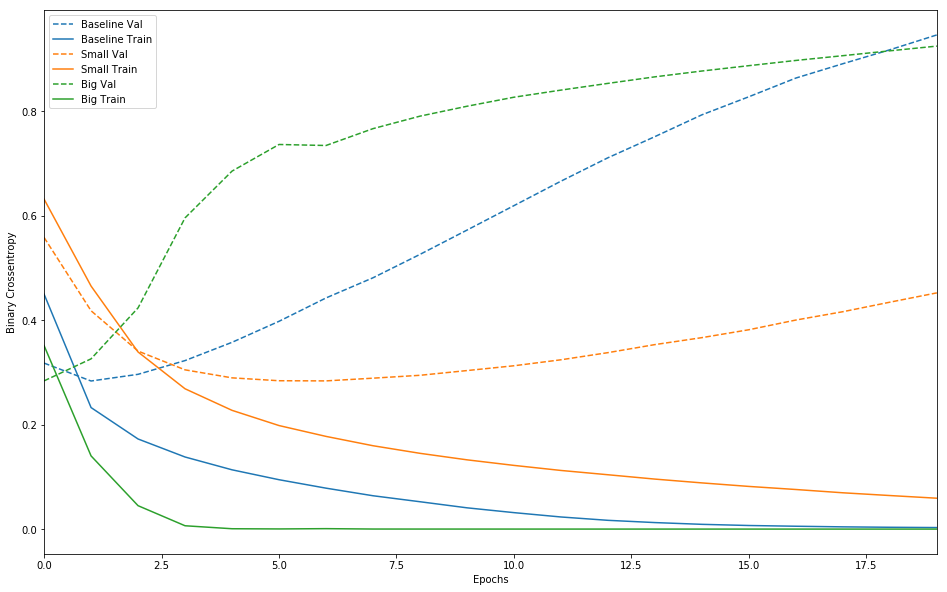

In [9]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('small', small_history),
              ('big', big_history)])

请注意，较大的网络在仅仅一个时期之后几乎立即开始过度拟合，并且更过拟合更严重。 网络容量越大，能够越快地对训练数据进行建模（导致训练损失低），但过度拟合的可能性越大（导致训练和验证损失之间的差异很大）

## 添加 L2 正则

In [10]:
l2_model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                 activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), 
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
l2_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
l2_model.summary()
l2_history = l2_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5165 - accuracy: 0.8194 - binary_crossentropy: 0.4767 - val_loss: 0.3732 - val_accuracy: 0.8784 - val_binary_crossentropy: 0.3316
Epoch 2/20
25000/25000 - 2s - loss: 0.2989 - accuracy: 0.9097 - binary_crossentropy: 0.2528 - val_loss: 0.3343 - val_accuracy: 0.8876 - val_binary_crossentropy:

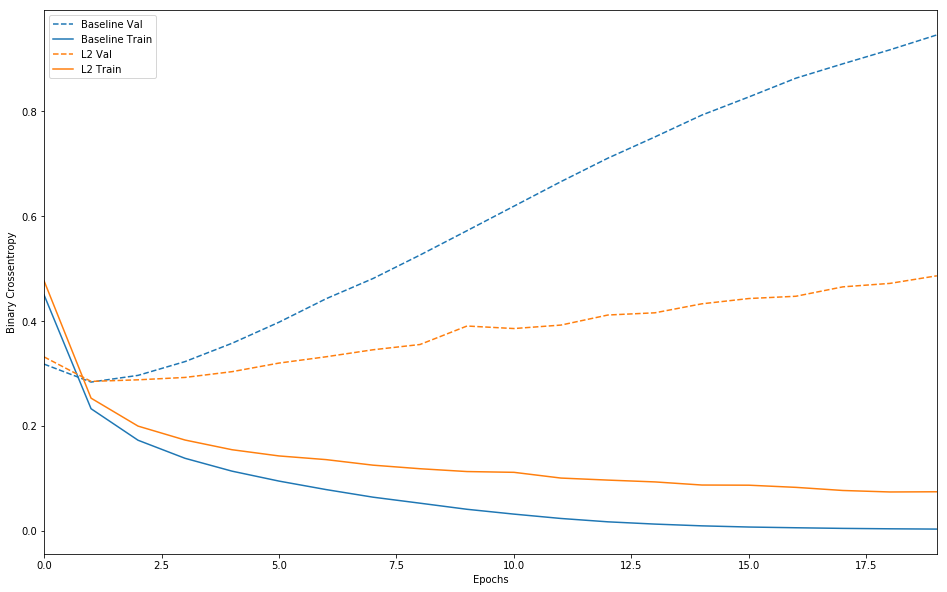

In [11]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history)])

## 添加 dropout

In [12]:
dpt_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
dpt_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
dpt_model.summary()
dpt_history = dpt_model.fit(train_data, train_labels,
                                     epochs=20, batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6294 - accuracy: 0.6416 - 

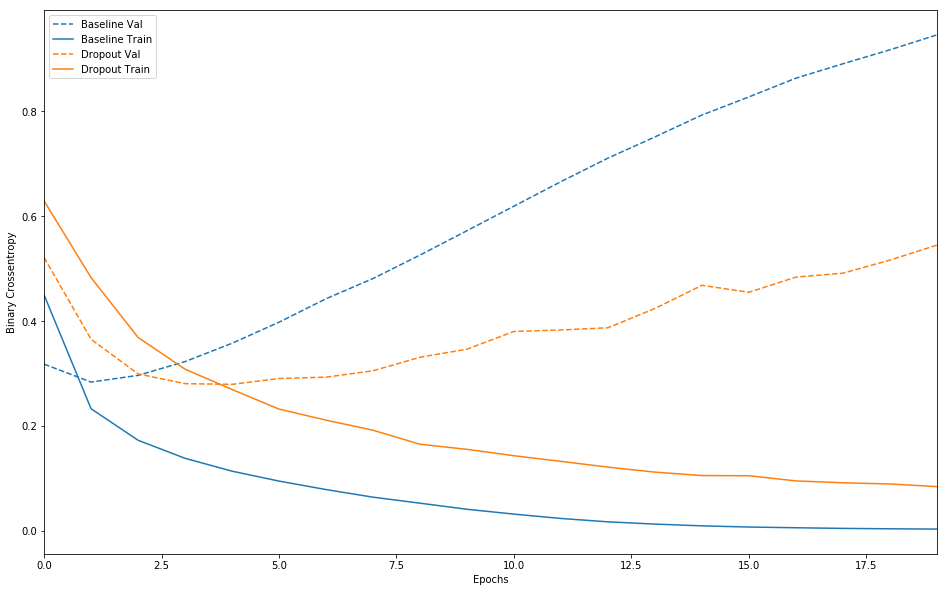

In [13]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_history)])

防止神经网络中过度拟合的最常用方法：

- 获取更多训练数据
- 减少网络容量
- 添加权重正规化
- 添加dropout